package import

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

Discrete Probability Distribution: 이산확률분포

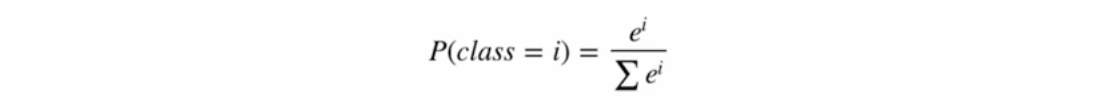

In [3]:
z = torch.FloatTensor([1, 2, 3])

In [4]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [5]:
hypothesis.sum()

tensor(1.)

CrossEntropy: 두개의 확률분포가 얼마나 비슷한지
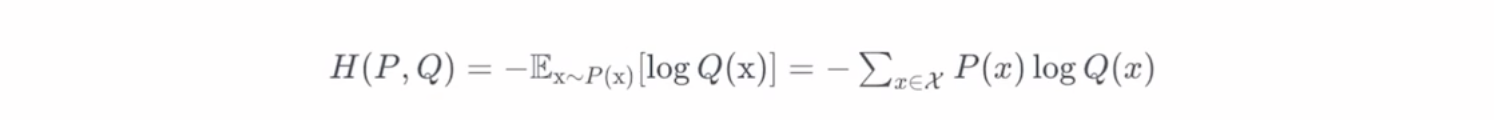

가지고 있는 확률분포함수Q를 P에 근사하게 하는 것이 목표이다.

Cross Entropy Loss(Low-level)

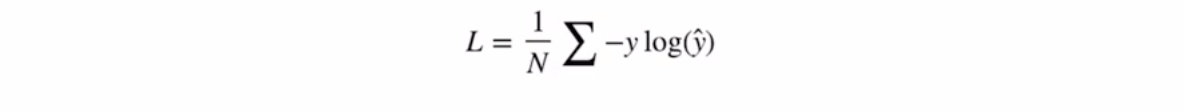

In [6]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis) #prediction: y헷을 구한 것

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [7]:
y = torch.randint(5,(3,)).long() #정답 랜덤하게 생성
print(y)

tensor([0, 2, 1])


In [8]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [9]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


Cross-entropy with torch.nn.functional

In [10]:
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [11]:
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

Cross-entropy Loss with torch.nn.functional

In [12]:
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [13]:
F.nll_loss(F.log_softmax(z, dim=1),y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [14]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

Training _ Low-level Cross Entropy Loss

In [15]:
X_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)



*   samples = m
*   classes = 3
*   dim = 4

4에서 3으로 가는 linear layer



In [20]:
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W,b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  logits = X_train.matmul(W) + b
  hypothesis = F.softmax(X_train.matmul(W) + b, dim=1)
  y_one_hot = torch.zeros_like(hypothesis)
  y_one_hot.scatter_(1, y_train.unsqueeze(1),1)
  cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.901535
Epoch  200/1000 Cost: 0.839114
Epoch  300/1000 Cost: 0.807826
Epoch  400/1000 Cost: 0.788472
Epoch  500/1000 Cost: 0.774822
Epoch  600/1000 Cost: 0.764449
Epoch  700/1000 Cost: 0.756191
Epoch  800/1000 Cost: 0.749398
Epoch  900/1000 Cost: 0.743671
Epoch 1000/1000 Cost: 0.738749


F.cross_entropy를 쓰면 scatter가 생략이 되어 원핫인코더를 쓸 필요가 없다

In [22]:
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W,b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  z = X_train.matmul(W) + b
  cost = F.cross_entropy(z, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


nn.Module high Implementation

In [25]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3) #4->3

  def forward(self, X):
    return self.linear(X) #|X| = (3,4)에서 return (m, 3)

In [26]:
model = SoftmaxClassifierModel()

In [27]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  prediction = model(X_train) #|X_train| = (m,4)

  cost = F.cross_entropy(prediction, y_train)#|prediction| = (m,3), |y_train|=(m, )

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.845720
Epoch  100/1000 Cost: 0.647150
Epoch  200/1000 Cost: 0.568868
Epoch  300/1000 Cost: 0.515699
Epoch  400/1000 Cost: 0.471727
Epoch  500/1000 Cost: 0.432486
Epoch  600/1000 Cost: 0.395879
Epoch  700/1000 Cost: 0.360507
Epoch  800/1000 Cost: 0.325228
Epoch  900/1000 Cost: 0.289217
Epoch 1000/1000 Cost: 0.254086
